In [75]:
import sklearn.datasets as skd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle

combined_df = pd.read_csv("combined.csv", sep=";").dropna()

# new_df = combined_df.copy().dropna()
# new_df.info()

combined_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000
mean,0.597248,0.640883,5.170627,-7.197439,0.628802,0.085426,0.259062,0.079560,0.188295,0.473958,122.085882,213190.354563,3.923479
std,0.152274,0.222441,3.565817,3.642032,0.483240,0.084379,0.303839,0.221496,0.148387,0.220511,29.185505,65100.903171,0.345255
min,0.114000,0.012700,0.000000,-33.711000,0.000000,0.024000,0.000002,0.000000,0.015800,0.034800,48.086000,39291.000000,1.000000
25%,0.488000,0.500000,2.000000,-8.460000,0.000000,0.035900,0.015300,0.000000,0.099900,0.308000,99.961500,173500.000000,4.000000
50%,0.595500,0.673000,5.000000,-6.375500,1.000000,0.050550,0.115500,0.000017,0.128000,0.460500,120.993000,201246.500000,4.000000
75%,0.708000,0.817000,8.000000,-4.759750,1.000000,0.093825,0.442500,0.002917,0.236000,0.644000,141.879750,236217.500000,4.000000
max,0.978000,0.999000,11.000000,-0.173000,1.000000,0.680000,0.994000,0.967000,0.989000,0.984000,204.561000,712827.000000,5.000000


In [76]:
# X = combined_df.drop(columns = ["Genre", "Title", "Artist", "Track URL"])
X = combined_df.drop(columns = ["Genre", "Title", "Artist", "Track URL"])
y = combined_df.Genre
columns = ['danceability', 'energy', 'key', 'loudness', 'mode','speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'duration_ms']
# columns = ['danceability', 'energy', 'loudness', 'speechiness',
#        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
#        'duration_ms']

In [77]:
# create scale to normalize input values
scaler = MinMaxScaler(feature_range=(-1,1))
# convert inputs to Neural Network to array for normalization
dfData = X.to_numpy()
# fit the scaler object to our input data
print(scaler.fit(dfData))
# normalize inputs to Neural Network
Xn = scaler.transform(dfData)
# convert array of inputs back to dataframe now that they have been normalized
Xndf = pd.DataFrame(Xn, columns=columns)
# check to make sure normalization worked
Xndf.describe()


MinMaxScaler(feature_range=(-1, 1))


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
count,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000
mean,0.118629,0.273817,-0.059886,0.581106,0.257605,-0.812726,-0.478751,-0.835449,-0.645510,-0.074677,-0.054164,-0.483623,0.461740
std,0.352487,0.451062,0.648330,0.217188,0.966480,0.257252,0.611348,0.458109,0.304946,0.464624,0.373037,0.193311,0.172628
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.134259,-0.011863,-0.636364,0.505814,-1.000000,-0.963720,-0.969219,-1.000000,-0.827168,-0.424357,-0.336948,-0.601479,0.500000
50%,0.114583,0.338944,-0.090909,0.630121,1.000000,-0.919055,-0.767609,-0.999964,-0.769420,-0.103034,-0.068132,-0.519089,0.500000
75%,0.375000,0.630944,0.454545,0.726474,1.000000,-0.787119,-0.109660,-0.993966,-0.547472,0.283607,0.198834,-0.415246,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=42)

In [79]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

0.10841654778887304

In [80]:
from sklearn.svm import SVC

svc_model = SVC().fit(X_train,y_train)
svc_model.score(X_test,y_test)


0.15263908701854492

In [81]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier().fit(X_train,y_train)
dt_model.score(X_test,y_test)

0.2867332382310984

In [82]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train,y_train)
rf_model.score(X_test,y_test)


0.4194008559201141

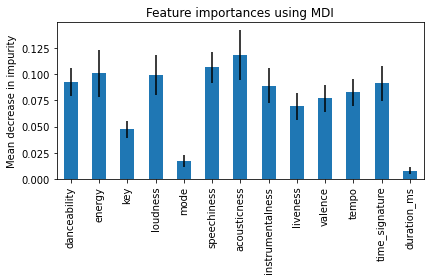

In [83]:

import matplotlib.pyplot as plt
import numpy as np

importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis =0)
forest_importances = pd.Series(importances, index=columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Random Forest Classifier Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

c:\Users\megha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


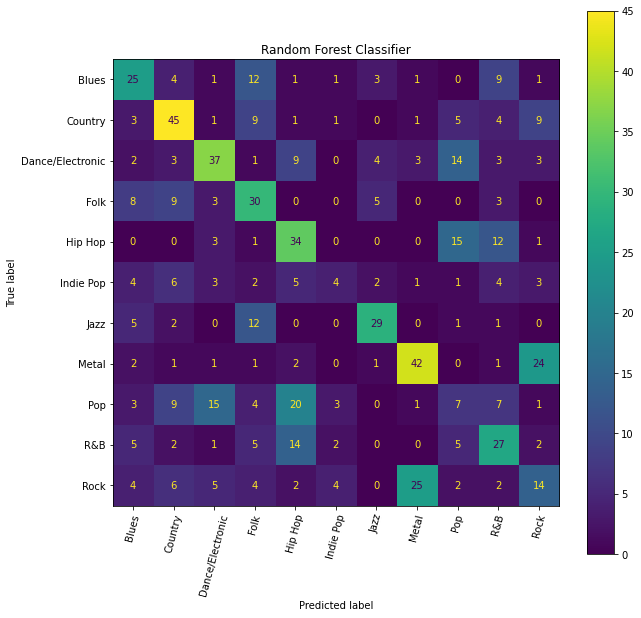

c:\Users\megha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


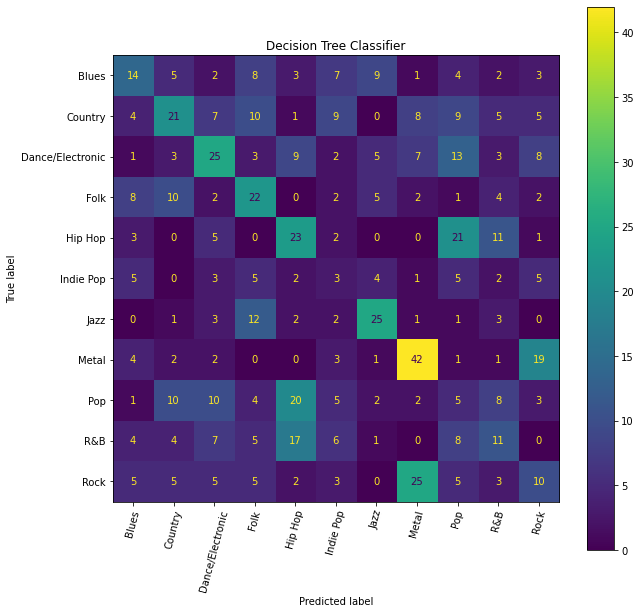

In [95]:
# from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
# from sklearn.model_selection import train_test_split

plot_confusion_matrix(rf_model, X_test, y_test)  
plt.rcParams["figure.figsize"] = (10,10)
plt.xticks(rotation=75)
plt.title("Random Forest Classifier")
plt.show()

plot_confusion_matrix(dt_model, X_test, y_test)  
plt.rcParams["figure.figsize"] = (10,10)
plt.xticks(rotation=75)
plt.title("Decision Tree Classifier")
plt.show()